In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Step 1: Sample Data (User-Product Ratings)
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 5, 5, 5],
    'product_name': ['Laptop', 'Headphones', 'Mouse', 'Laptop', 'Keyboard', 'Keyboard', 'Mouse', 'Laptop', 'Mouse', 'Keyboard', 'Headphones'],
    'rating': [5, 3, 4, 5, 2, 4, 5, 4, 4, 3, 5]
}



In [3]:
df = pd.DataFrame(data)


In [4]:
# Step 2: Create a User-Item Matrix
user_item_matrix = df.pivot_table(index='user_id', columns='product_name', values='rating').fillna(0)



In [5]:

# Step 3: Compute Cosine Similarity Between Users
user_similarity = cosine_similarity(user_item_matrix)
user_sim_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


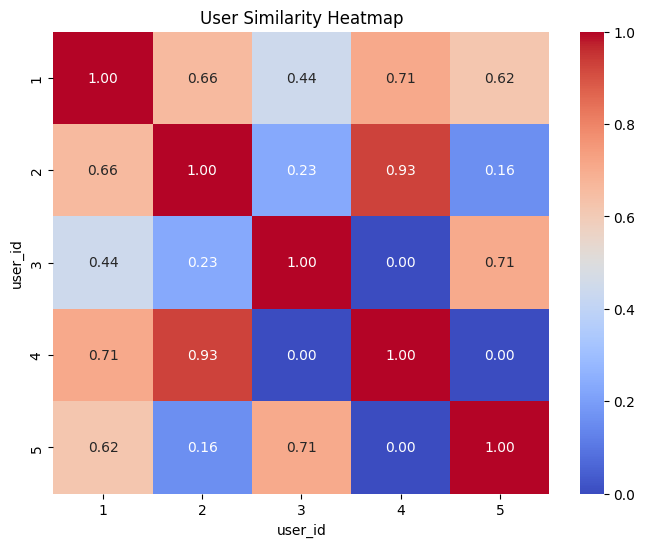

In [6]:
# Step 4: Visualize User Similarity
plt.figure(figsize=(8, 6))
sns.heatmap(user_sim_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("User Similarity Heatmap")
plt.show()


In [7]:

# Step 5: Recommend Products for a User Based on Similar Users
def recommend_products(user_id, num_recommendations=3):
    # Get similarity scores for the given user
    similar_users = user_sim_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)  # Exclude the user themself

    # Get products rated by similar users
    similar_users_ids = similar_users.index
    similar_users_ratings = user_item_matrix.loc[similar_users_ids]

    # Compute weighted average rating for each product
    weighted_scores = similar_users_ratings.T.dot(similar_users)
    recommendation_scores = weighted_scores / similar_users.sum()

    # Filter out products already rated by the user
    already_rated = user_item_matrix.loc[user_id]
    recommendation_scores = recommendation_scores[already_rated == 0]

    recommended_products = recommendation_scores.sort_values(ascending=False).head(num_recommendations)
    return recommended_products



In [8]:
# Step 6: Show Recommendations for a User
user_to_recommend = 4
recommendations = recommend_products(user_to_recommend)
print(f"\nRecommended products for User {user_to_recommend}:\n{recommendations}")




Recommended products for User 4:
product_name
Mouse         1.729308
Headphones    1.296981
Keyboard      1.135346
dtype: float64


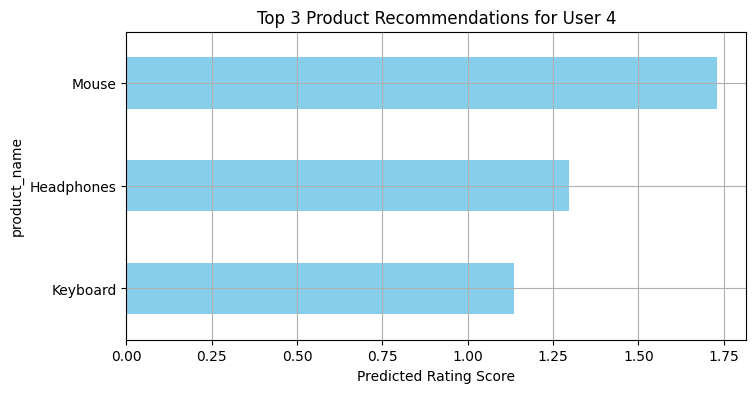

In [9]:
# Step 7: Visualize the Top Recommendations
plt.figure(figsize=(8, 4))
recommendations.plot(kind='barh', color='skyblue')
plt.xlabel("Predicted Rating Score")
plt.title(f"Top {len(recommendations)} Product Recommendations for User {user_to_recommend}")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()